In [127]:
import json
import pandas as pd

In [128]:
with open("/Users/sandeep.jaiswal/PycharmProjects/cric-service/data.json","r") as fp:
    data =json.load(fp)

In [129]:
data

{'Test # 2359': {'4s': '10',
  'Bat1': '76',
  'Opposition': 'v West Indies',
  'Bat2': '0',
  'Start Date': '30 Aug 2019',
  'Ground': 'Kingston',
  'BF': '164',
  'Runs': '76',
  'SR': '46.34',
  '6s': '0'},
 'Test # 2364': {'BF': '336',
  'Runs': '254',
  'SR': '75.59',
  '6s': '2',
  '4s': '33',
  'Bat1': '254*',
  'Opposition': 'v South Africa',
  'Bat2': '-',
  'Start Date': '10 Oct 2019',
  'Ground': 'Pune'},
 'Test # 2365': {'Start Date': '19 Oct 2019',
  'Ground': 'Ranchi',
  'BF': '22',
  'Runs': '12',
  '6s': '0',
  'SR': '54.54',
  '4s': '2',
  'Opposition': 'v South Africa',
  'Bat1': '12',
  'Bat2': '-'},
 'Test # 2019': {'4s': '8',
  'Opposition': 'v West Indies',
  'Bat1': '52',
  'Bat2': '63',
  'Start Date': '22 Nov 2011',
  'Ground': 'Mumbai',
  'BF': '225',
  'Runs': '115',
  '6s': '1',
  'SR': '51.11'},
 'Test # 2025': {'Start Date': '26 Dec 2011',
  'Ground': 'Melbourne',
  'BF': '22',
  'Runs': '11',
  'SR': '50.00',
  '6s': '0',
  '4s': '1',
  'Bat1': '11',
  'O

In [130]:
data_frame = pd.DataFrame.from_dict(data, orient='index')


In [131]:
data_frame

,4s,Bat1,Opposition,Bat2,Start Date,Ground,BF,Runs,SR,6s
Test # 2359,10,76,v West Indies,0,30 Aug 2019,Kingston,164,76,46.34,0
Test # 2364,33,254*,v South Africa,-,10 Oct 2019,Pune,336,254,75.59,2
Test # 2365,2,12,v South Africa,-,19 Oct 2019,Ranchi,22,12,54.54,0
Test # 2019,8,52,v West Indies,63,22 Nov 2011,Mumbai,225,115,51.11,1
Test # 2025,1,11,v Australia,0,26 Dec 2011,Melbourne,22,11,50.00,0
...,...,...,...,...,...,...,...,...,...,...
Test # 2293,16,153,v South Africa,5,13 Jan 2018,Centurion,237,158,66.66,0
Test # 2339,4,23,v Australia,-,3 Jan 2019,Sydney,59,23,38.98,0
Test # 2294,15,54,v South Africa,41,24 Jan 2018,Johannesburg,185,95,51.35,0
Test # 2358,4,9,v West Indies,51,22 Aug 2019,North Sound,125,60,48.00,0


In [132]:
def formatDate(date):
    year = date.split(" ")[-1]
    return year

In [133]:
data_frame['Year'] = data_frame['Start Date'].apply(lambda date: formatDate(date))


In [134]:
data_frame

,4s,Bat1,Opposition,Bat2,Start Date,Ground,BF,Runs,SR,6s,Year
Test # 2359,10,76,v West Indies,0,30 Aug 2019,Kingston,164,76,46.34,0,2019
Test # 2364,33,254*,v South Africa,-,10 Oct 2019,Pune,336,254,75.59,2,2019
Test # 2365,2,12,v South Africa,-,19 Oct 2019,Ranchi,22,12,54.54,0,2019
Test # 2019,8,52,v West Indies,63,22 Nov 2011,Mumbai,225,115,51.11,1,2011
Test # 2025,1,11,v Australia,0,26 Dec 2011,Melbourne,22,11,50.00,0,2011
...,...,...,...,...,...,...,...,...,...,...,...
Test # 2293,16,153,v South Africa,5,13 Jan 2018,Centurion,237,158,66.66,0,2018
Test # 2339,4,23,v Australia,-,3 Jan 2019,Sydney,59,23,38.98,0,2019
Test # 2294,15,54,v South Africa,41,24 Jan 2018,Johannesburg,185,95,51.35,0,2018
Test # 2358,4,9,v West Indies,51,22 Aug 2019,North Sound,125,60,48.00,0,2019


In [135]:
def calculate_inns_average(column_data):
    total_runs = 0
    total_innings = 0
    for data in column_data:
        if "*" in data:
            runs = data.replace("*",'')
            total_runs = total_runs + int(runs)
        elif data=="-" or data=="DNB" or data=="TDNB":
            continue
        else:
            total_runs += int(data)
            total_innings +=1
    return(total_runs,total_innings)        

In [136]:
def calculate_average_per_year(data_frame):
    first_inns_data = calculate_inns_average(data_frame["Bat1"])
    second_inns_data = calculate_inns_average(data_frame["Bat2"])
    total_average = round((first_inns_data[0] + second_inns_data[0])/(first_inns_data[1] + second_inns_data[1]),2)
    return (total_average,first_inns_data[1]+second_inns_data[1])

In [137]:
summary_df = data_frame.groupby(['Year'])

In [138]:
averages = []
innings = []
for key, item in summary_df:
    res = calculate_average_per_year(summary_df.get_group(key))
    averages.append(res[0])
    innings.append(res[1])

In [139]:
averages

[22.44, 49.21, 56.0, 44.58, 42.67, 75.94, 75.64, 55.08, 68.0]

In [140]:
summary_df = data_frame.groupby(['Year']).agg({'Opposition': 'count'})
summary_df["Innings"] = pd.Series(innings).values
summary_df["Average"] = pd.Series(averages).values
summary_df.rename(columns={"Opposition":"Matches"},inplace=True)

In [141]:
summary_df

,Matches,Innings,Average
Year,,,
2011,5,9,22.44
2012,9,14,49.21
2013,8,11,56.00
2014,10,19,44.58
2015,9,15,42.67
2016,12,16,75.94
2017,10,14,75.64
2018,13,24,55.08
2019,6,7,68.00


In [142]:
summary2 = summary_df.copy()

In [143]:
summary2.loc["2010"]= summary2.loc["2016"]

In [144]:
summary2

,Matches,Innings,Average
Year,,,
2011,5.0,9.0,22.44
2012,9.0,14.0,49.21
2013,8.0,11.0,56.00
2014,10.0,19.0,44.58
2015,9.0,15.0,42.67
2016,12.0,16.0,75.94
2017,10.0,14.0,75.64
2018,13.0,24.0,55.08
2019,6.0,7.0,68.00


In [157]:
res = pd.concat([summary_df, summary2], axis=1,sort=True)

In [158]:
res

,Matches,Innings,Average,Matches,Innings,Average
2010,NaN,NaN,NaN,12.0,16.0,75.94
2011,5.0,9.0,22.44,5.0,9.0,22.44
2012,9.0,14.0,49.21,9.0,14.0,49.21
2013,8.0,11.0,56.00,8.0,11.0,56.00
2014,10.0,19.0,44.58,10.0,19.0,44.58
2015,9.0,15.0,42.67,9.0,15.0,42.67
2016,12.0,16.0,75.94,12.0,16.0,75.94
2017,10.0,14.0,75.64,10.0,14.0,75.64
2018,13.0,24.0,55.08,13.0,24.0,55.08
2019,6.0,7.0,68.00,6.0,7.0,68.00


In [147]:
years = res.index.values.astype(pd.Series)

In [148]:
years

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019'], dtype=object)

In [149]:
res.reset_index(inplace=True)

In [150]:
res

,index,Matches,Innings,Average,Matches,Innings,Average
0,2010,NaN,NaN,NaN,12.0,16.0,75.94
1,2011,5.0,9.0,22.44,5.0,9.0,22.44
2,2012,9.0,14.0,49.21,9.0,14.0,49.21
3,2013,8.0,11.0,56.00,8.0,11.0,56.00
4,2014,10.0,19.0,44.58,10.0,19.0,44.58
5,2015,9.0,15.0,42.67,9.0,15.0,42.67
6,2016,12.0,16.0,75.94,12.0,16.0,75.94
7,2017,10.0,14.0,75.64,10.0,14.0,75.64
8,2018,13.0,24.0,55.08,13.0,24.0,55.08
9,2019,6.0,7.0,68.00,6.0,7.0,68.00


In [151]:
play1 = summary_df.Average

In [152]:
play2 = summary2.Average

In [153]:
import matplotlib.pyplot as plt

In [154]:
plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

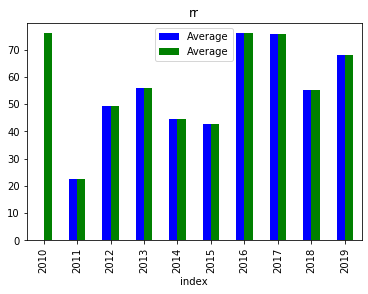

In [156]:
res.plot(kind='bar', x='index', y=["Average"], color=['Blue', 'Green'],
                            title="rr")